In [ ]:
from matplotlib import pyplot as plt
import numpy as np

# import a lot of things from keras:
# sequential model
from keras.models import Sequential

# layers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

# loss function
from keras.metrics import categorical_crossentropy

# callback functions
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# convert data to categorial vector representation
from keras.utils import to_categorical


from torchvision.datasets import EMNIST

In [44]:
# Load the EMNIST dataset from pytorch

train_data = EMNIST(root="data", split="letters", train=True, download=True)
test_data = EMNIST(root="data", split="letters", train=False, download=True)

In [45]:
# Convert images to numpy arrays and rotate them to the correct orientation
def convert_imgs(data):
    X = []
    y = []
    for img, label in data:
        img = np.array(img)
        img = np.transpose(img)
        X.append(img)
        y.append(label)
    return X, y

X_train, y_train = convert_imgs(train_data)
X_test, y_test = convert_imgs(test_data)

X_train = np.array(X_train).astype("float32")
y_train = np.array(y_train)
X_test = np.array(X_test).astype("float32")
y_test = np.array(y_test)

In [46]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(124800, 28, 28) (124800,)
(20800, 28, 28) (20800,)


In [47]:
# Add channel dimension for compatibility with CNN
X_train = X_train.reshape(len(X_train), 28, 28, 1)
X_test = X_test.reshape(len(X_test), 28, 28, 1)

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

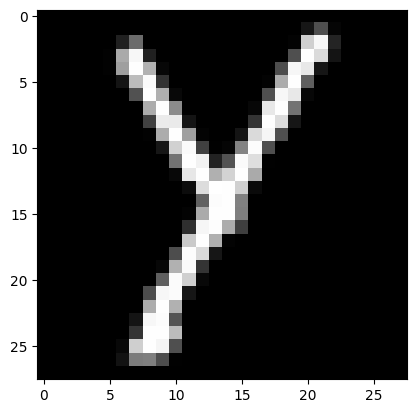

In [48]:
i = np.random.randint(len(X_train))
plt.imshow(X_train[i].squeeze(), cmap="gray")

In [49]:
# variables for hyperparameters
batch_size = 16
epochs = 50
num_classes = len(train_data.classes)
activation = 'relu'
activation_conv = 'leaky_relu'
num_neurons = 64

model = Sequential()

model.add(Conv2D(32, (5, 5), activation=activation_conv, padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), padding='same'))
model.add(Conv2D(32, (3, 3), activation=activation_conv, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dense(num_neurons, activation=activation))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=categorical_crossentropy, optimizer="adam", metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)
stop_early = EarlyStopping(monitor='val_loss', patience=3)

In [50]:
history = model.fit(
    X_train,
    y_train_cat,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_test, y_test_cat),
    callbacks=[reduce_lr, stop_early]
)

Epoch 1/50
7800/7800 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.7433 - loss: 0.8422 - val_accuracy: 0.9158 - val_loss: 0.2607 - learning_rate: 0.0010
Epoch 2/50
7800/7800 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8949 - loss: 0.3176 - val_accuracy: 0.9283 - val_loss: 0.2171 - learning_rate: 0.0010
Epoch 3/50
7800/7800 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9093 - loss: 0.2681 - val_accuracy: 0.9237 - val_loss: 0.2317 - learning_rate: 0.0010
Epoch 4/50
7800/7800 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9165 - loss: 0.2470 - val_accuracy: 0.9328 - val_loss: 0.2001 - learning_rate: 0.0010
Epoch 5/50
7800/7800 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9217 - loss: 0.2297 - val_accuracy: 0.9328 - val_loss: 0.1964 - learning_rate: 0.0010
Epoch 6/50
7800/7800 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9239 - loss: 0.2229 - val_accuracy: 0.9377 - val_loss: 0.1852 - learning_rate: 0.0010
Epoch 7/50
7800/7800 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9

In [51]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (16, 28, 28, 32)            │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (16, 10, 10, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (16, 10, 10, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (16, 5, 5, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (16, 5, 5, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (16, 5, 5, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (16, 800)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (16, 64)                    │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (16, 27)                    │           1,755 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 189,555 (740.45 KB)

 Trainable params: 63,163 (246.73 KB)

 Non-trainable params: 64 (256.00 B)

 Optimizer params: 126,328 (493.47 KB)

In [52]:
model.save(f"letter_recognition.keras")